<a href="https://colab.research.google.com/github/khaichiong/meco7312/blob/master/L12_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrapping as a tool to obtain the sampling distribution of a statistic

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Generate data

In [2]:
n = 1000 #sample size
ld = 0.5 #rate parameter
x = np.random.exponential(1/ld,(n,)) #this is our sample

## Bootstrapping

In [3]:
B = 10000 #number of bootstrapped samples
Bs = []
for b in range(0,B):
  Bs.append(np.random.choice(x,n,replace=True))
Bs = np.asarray(Bs)  

In [4]:
#Bs stores all the bootstrapped samples
Bs = np.asarray(Bs)  
Bs = Bs.transpose()
np.shape(Bs)

(1000, 10000)

## Compute bootstrapped statistic

In [5]:
def svar(X):
  return np.var(X)

In [6]:
#compute statistic on each column using list comprehension
t_boostrapped = [svar(Bs[:,i]) for i in range(0,B)]

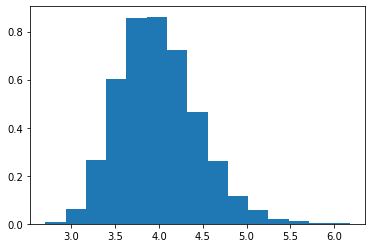

In [7]:
plt.hist(t_boostrapped,bins = 15,density=True)
plt.show()

## Compare with actual sampling distribution

In [8]:
s = 10000 #number of monte carlo experiments
x_mc = np.random.exponential(1/ld,(n,s))

In [9]:
t_mc = [svar(x_mc[:,i]) for i in range(0,s)]

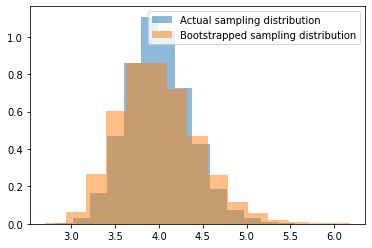

In [10]:
plt.hist(t_mc,bins = 15,density=True, alpha=0.5,label="Actual sampling distribution")
plt.hist(t_boostrapped,bins = 15,density=True, alpha=0.5,label="Bootstrapped sampling distribution")
plt.legend(loc='upper right')
plt.show()

Try different values of sample size and number of bootstraps